# Final-Project-Part-3-EDA-Gilbert-Zhang

## Importing and Reading Data

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def read_dataset(x):
    return pd.read_csv(os.path.join('..', 'datasets', x))

df = read_dataset('shot_logs.csv')

In [3]:
df.head(2)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148


In [4]:
df.shape

(128069, 21)

Dropping NaN

In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(122502, 21)

## Dataset spliting

In [7]:
df.shape

(122502, 21)

In [8]:
train_df = df.sample(frac = .6, random_state = 0)
test_df = df.drop(train_df.index)

## Data Exploration

Dimension of the training dataset:

In [9]:
train_df.shape

(73501, 21)

In [10]:
train_df.dtypes

GAME_ID             int64
MATCHUP            object
LOCATION           object
W                  object
FINAL_MARGIN        int64
                   ...   
CLOSE_DEF_DIST    float64
FGM                 int64
PTS                 int64
player_name        object
player_id           int64
dtype: object

In [11]:
train_df.columns

Index([u'GAME_ID', u'MATCHUP', u'LOCATION', u'W', u'FINAL_MARGIN',
       u'SHOT_NUMBER', u'PERIOD', u'GAME_CLOCK', u'SHOT_CLOCK', u'DRIBBLES',
       u'TOUCH_TIME', u'SHOT_DIST', u'PTS_TYPE', u'SHOT_RESULT',
       u'CLOSEST_DEFENDER', u'CLOSEST_DEFENDER_PLAYER_ID', u'CLOSE_DEF_DIST',
       u'FGM', u'PTS', u'player_name', u'player_id'],
      dtype='object')

In [12]:
train_df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,7.350100e+04,73501.000000,73501.000000,73501.000000,73501.000000,73501.000000,73501.000000,73501.000000,73501.000000,73501.000000,73501.000000,73501.000000,73501.000000,73501.000000
mean,2.140045e+07,0.274989,6.461953,2.470728,12.462889,1.973660,2.735931,13.447242,2.258541,159327.518156,4.128529,0.458048,1.009496,157421.253194
std,2.575376e+02,13.306978,4.677389,1.138971,5.763308,3.392968,2.930719,8.778809,0.437836,78512.580553,2.755741,0.498240,1.131427,79204.610316
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-14.000000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,200746.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.400000,2.000000,201950.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.700000,2.000000,3.700000,22.400000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,36.000000,7.000000,24.000000,31.000000,24.400000,43.500000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


## Variables Exploration

### Response variable

In [13]:
train_df['SHOT_RESULT'].value_counts()

missed    39834
made      33667
Name: SHOT_RESULT, dtype: int64

In [14]:
#transforming response variable
train_df['shot_result_t'] = 0
train_df.at[train_df['SHOT_RESULT'] == 'made','shot_result_t'] = 1 

In [15]:
train_df['shot_result_t'].value_counts()

0    39834
1    33667
Name: shot_result_t, dtype: int64

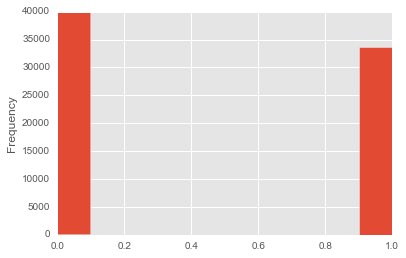

In [16]:
train_df.shot_result_t.plot(kind = 'hist')

### Predictor variables

Location

In [17]:
train_df['LOCATION'].value_counts()

H    36777
A    36724
Name: LOCATION, dtype: int64

In [18]:
#transforming response variable
train_df['location_t'] = 0
train_df.at[train_df['LOCATION'] == 'A','location_t'] = 1 

In [19]:
train_df['location_t'].value_counts()

0    36777
1    36724
Name: location_t, dtype: int64

In [20]:
train_df[['location_t', 'shot_result_t']].corr()

,location_t,shot_result_t
location_t,1.000000,-0.009195
shot_result_t,-0.009195,1.000000


W

In [60]:
df.W.value_counts()

W    62149
L    60353
Name: W, dtype: int64

SHOT_NUMBER

In [21]:
train_df['SHOT_NUMBER'].value_counts()

1     8294
2     7981
3     7622
4     7003
5     6450
      ... 
33       7
32       6
34       4
35       2
36       2
Name: SHOT_NUMBER, dtype: int64

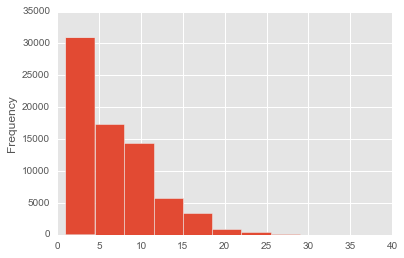

In [22]:
train_df.SHOT_NUMBER.plot(kind = 'hist')

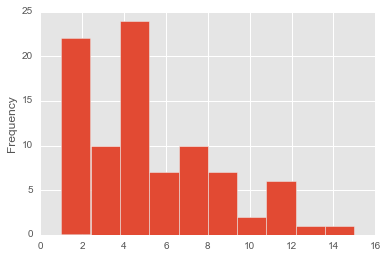

In [23]:
train_df[train_df['GAME_ID'] == 21400899].SHOT_NUMBER.plot(kind = 'hist')

In [24]:
train_df[train_df['GAME_ID'] == 21400899].player_id

489         2744
3364      203077
125728    101114
121134      2590
3360      203077
           ...  
5         203148
6         203148
127098    202711
127013    202366
127012    202366
Name: player_id, dtype: int64

In [25]:
pd.crosstab(df[df['GAME_ID'] == 21400899].player_id,df[df['GAME_ID'] == 21400899].SHOT_NUMBER)

SHOT_NUMBER,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
player_id,,,,,,,,,,,,,,,,
2207,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2590,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
2744,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
101107,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
101114,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202711,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
203077,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
203148,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0


In [26]:
train_df.corr().SHOT_NUMBER.sort

<bound method Series.sort of GAME_ID          0.009511
FINAL_MARGIN     0.002762
SHOT_NUMBER      1.000000
PERIOD           0.654275
SHOT_CLOCK      -0.033059
                   ...   
FGM             -0.009192
PTS             -0.011074
player_id       -0.003692
shot_result_t   -0.009192
location_t       0.005388
Name: SHOT_NUMBER, dtype: float64>

SHOT_NUMBER seems to be the nth of shots taken by the player in one game.

In [27]:
train_df[['SHOT_NUMBER', 'shot_result_t']].corr()

,SHOT_NUMBER,shot_result_t
SHOT_NUMBER,1.000000,-0.009192
shot_result_t,-0.009192,1.000000


PERIOD

In [28]:
train_df['PERIOD'].value_counts()

1    19477
3    18594
2    18063
4    16769
5      476
6       94
7       28
Name: PERIOD, dtype: int64

In [29]:
train_df[['PERIOD', 'shot_result_t']].corr()

,PERIOD,shot_result_t
PERIOD,1.000000,-0.014769
shot_result_t,-0.014769,1.000000


FINAL MARGIN

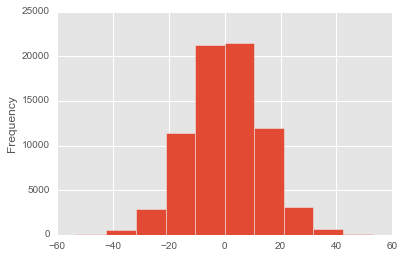

In [30]:
train_df.FINAL_MARGIN.plot(kind = 'hist')

In [31]:
train_df[['FINAL_MARGIN', 'shot_result_t']].corr()

,FINAL_MARGIN,shot_result_t
FINAL_MARGIN,1.000000,0.059687
shot_result_t,0.059687,1.000000


In [32]:
#It does seem that the wider the margin the easier to make shots. Consider transforming the variable to absolute margin?

SHOT CLOCK

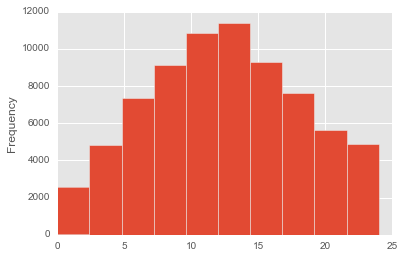

In [33]:
train_df['SHOT_CLOCK'].plot(kind = 'hist')

In [34]:
train_df[['SHOT_CLOCK', 'shot_result_t']].corr()

,SHOT_CLOCK,shot_result_t
SHOT_CLOCK,1.000000,0.098103
shot_result_t,0.098103,1.000000


GAME_CLOCK

In [37]:
train_df['GAME_CLOCK'].unique()

array(['9:55', '8:50', '3:41', '7:22', '10:34', '2:58', '4:33', '3:29',
       '10:56', '8:39', '2:04', '5:45', '1:12', '3:23', '2:07', '1:32',
       '1:14', '10:23', '10:07', '9:10', '4:06', '1:51', '7:44', '3:55',
       '9:48', '6:38', '6:20', '6:37', '11:09', '1:01', '0:38', '9:07',
       '4:50', '7:37', '4:12', '9:53', '0:08', '0:53', '3:36', '6:53',
       '3:04', '11:25', '7:18', '1:44', '8:47', '7:06', '10:30', '11:21',
       '8:35', '7:58', '2:19', '4:02', '1:00', '6:19', '3:59', '4:19',
       '8:09', '11:03', '5:18', '3:56', '11:49', '7:28', '4:01', '9:02',
       '9:49', '10:26', '3:42', '11:06', '0:09', '5:08', '1:47', '10:10',
       '10:08', '0:04', '4:36', '11:51', '8:04', '8:38', '11:12', '4:58',
       '4:10', '6:41', '7:29', '5:34', '2:55', '10:24', '4:40', '10:35',
       '3:46', '2:18', '0:52', '8:02', '2:13', '0:28', '9:54', '11:07',
       '7:47', '2:03', '5:09', '10:44', '10:19', '4:22', '3:49', '4:47',
       '6:07', '1:16', '3:09', '2:08', '7:35', '8:03', '

DRIBBLES

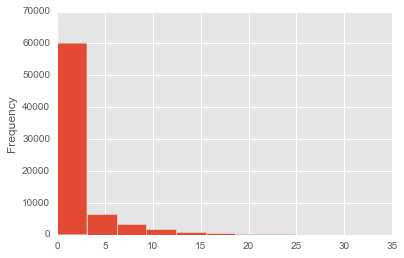

In [38]:
train_df['DRIBBLES'].plot(kind = 'hist')

In [78]:
train_df['DRIBBLES'].value_counts()

0     36575
1     11161
2      7938
3      4429
4      3021
      ...  
27        7
28        6
30        3
29        1
31        1
Name: DRIBBLES, dtype: int64

In [39]:
train_df[['DRIBBLES', 'shot_result_t']].corr()

,DRIBBLES,shot_result_t
DRIBBLES,1.000000,-0.034343
shot_result_t,-0.034343,1.000000


TOUCH_TIME

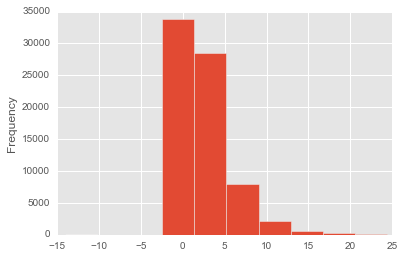

In [40]:
train_df['TOUCH_TIME'].plot(kind = 'hist')

In [77]:
train_df.TOUCH_TIME.value_counts()

 0.8     7249
 0.9     5094
 1.0     4770
 0.7     3795
 1.1     2402
         ... 
 22.6       1
 23.4       1
-5.3        1
-9.4        1
-1.0        1
Name: TOUCH_TIME, dtype: int64

In [41]:
train_df[['TOUCH_TIME', 'shot_result_t']].corr()

,TOUCH_TIME,shot_result_t
TOUCH_TIME,1.000000,-0.047534
shot_result_t,-0.047534,1.000000


SHOT_DIST

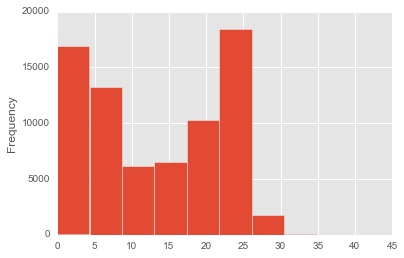

In [42]:
train_df['SHOT_DIST'].plot(kind = 'hist')

In [43]:
train_df[['SHOT_DIST', 'shot_result_t']].corr()

,SHOT_DIST,shot_result_t
SHOT_DIST,1.000000,-0.182194
shot_result_t,-0.182194,1.000000


PTS_TYPE

In [44]:
train_df['PTS_TYPE'].value_counts()

2    54498
3    19003
Name: PTS_TYPE, dtype: int64

In [45]:
train_df[['PTS_TYPE', 'shot_result_t']].corr()

,PTS_TYPE,shot_result_t
PTS_TYPE,1.000000,-0.114713
shot_result_t,-0.114713,1.000000


CLOSE_DEF_DIST

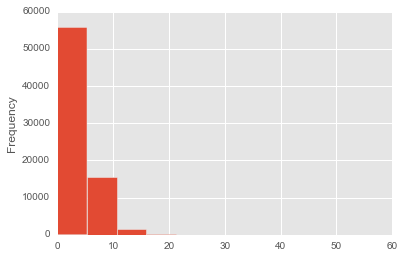

In [46]:
train_df['CLOSE_DEF_DIST'].plot(kind = 'hist')

In [47]:
train_df[['CLOSE_DEF_DIST', 'shot_result_t']].corr()

,CLOSE_DEF_DIST,shot_result_t
CLOSE_DEF_DIST,1.000000,0.004309
shot_result_t,0.004309,1.000000


FGM

In [48]:
train_df['FGM'].value_counts()

0    39834
1    33667
Name: FGM, dtype: int64

In [49]:
train_df['shot_result_t'].value_counts()

0    39834
1    33667
Name: shot_result_t, dtype: int64

PTS

In [50]:
train_df['PTS'].value_counts()

0    39834
2    26802
3     6865
Name: PTS, dtype: int64

## Relationship with response variable

From individual variables exploration, it seems that the most significant variables include: PERIOD, FINAL_MARGIN, SHOT_CLOCK, DRIBBLES, TOUCH_TIME, SHOT_DIST and CLOSE_DEF_DIST

In [51]:
train_df[['PERIOD', 'FINAL_MARGIN', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST', 'shot_result_t']].corr()

,PERIOD,FINAL_MARGIN,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,shot_result_t
PERIOD,1.000000,-0.000980,-0.049944,0.059489,0.049883,0.027135,-0.010323,-0.014769
FINAL_MARGIN,-0.000980,1.000000,-0.009524,0.009272,0.009164,0.011502,0.033089,0.059687
SHOT_CLOCK,-0.049944,-0.009524,1.000000,-0.083598,-0.148223,-0.172721,0.029974,0.098103
DRIBBLES,0.059489,0.009272,-0.083598,1.000000,0.926527,-0.089852,-0.159209,-0.034343
TOUCH_TIME,0.049883,0.009164,-0.148223,0.926527,1.000000,-0.090132,-0.171470,-0.047534
SHOT_DIST,0.027135,0.011502,-0.172721,-0.089852,-0.090132,1.000000,0.528145,-0.182194
CLOSE_DEF_DIST,-0.010323,0.033089,0.029974,-0.159209,-0.171470,0.528145,1.000000,0.004309
shot_result_t,-0.014769,0.059687,0.098103,-0.034343,-0.047534,-0.182194,0.004309,1.000000


In [52]:
color = train_df.shot_result_t.map(pd.Series({0: 'red', 1: 'green'}))

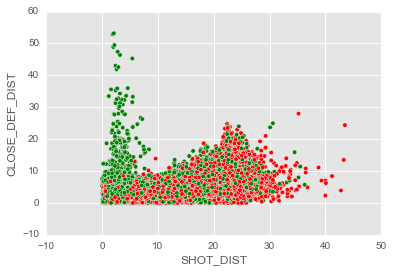

In [53]:
train_df.plot('SHOT_DIST', 'CLOSE_DEF_DIST', kind = 'scatter', c = color)

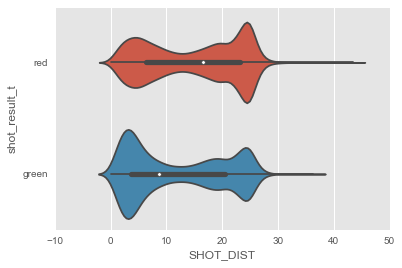

In [54]:
sns.violinplot(x="SHOT_DIST", y=color, data=train_df, size=6)

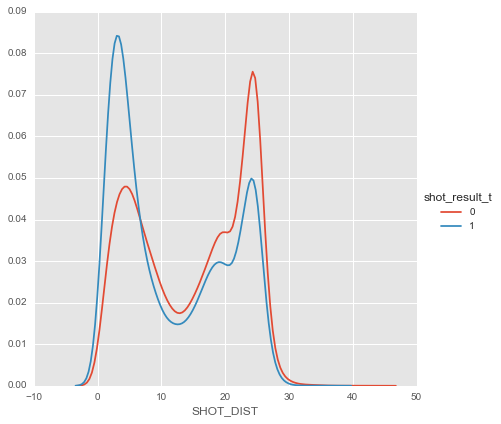

In [55]:
sns.FacetGrid(train_df, hue='shot_result_t', size=6) \
   .map(sns.kdeplot, "SHOT_DIST") \
   .add_legend()

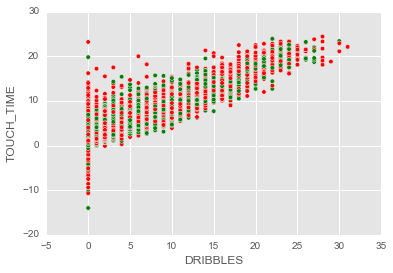

In [56]:
train_df.plot('DRIBBLES', 'TOUCH_TIME', kind = 'scatter', c = color)

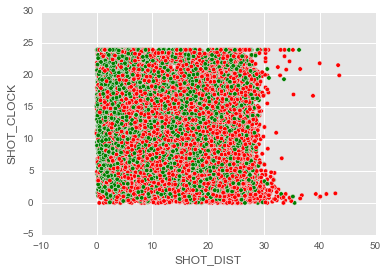

In [57]:
train_df.plot('SHOT_DIST', 'SHOT_CLOCK', kind = 'scatter', c = color)

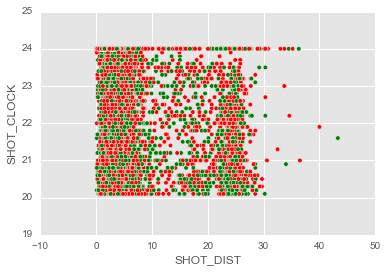

In [58]:
# why are there a lot of shots with shot clock >20
train_df[train_df['SHOT_CLOCK'] >20].plot('SHOT_DIST', 'SHOT_CLOCK', kind = 'scatter', c = color)

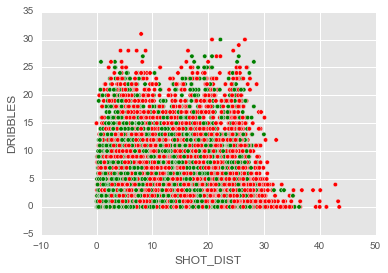

In [70]:
train_df.plot('SHOT_DIST', 'DRIBBLES', kind = 'scatter', c = color)

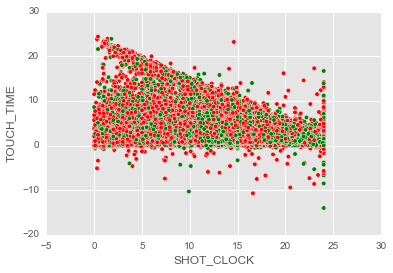

In [79]:
train_df.plot('SHOT_CLOCK', 'TOUCH_TIME', kind = 'scatter', c = color)